In [1]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
img = Image.open("ironman.jpg")

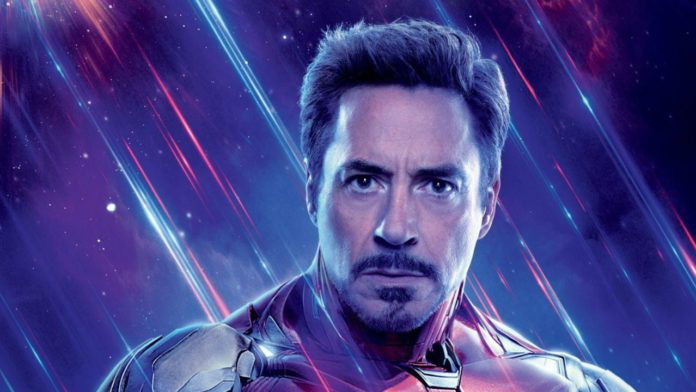

In [4]:
img

In [5]:
#loading image using keras
from tensorflow.keras.preprocessing.image import load_img

In [6]:
img = load_img("ironman.jpg",target_size=(50,50))

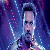

In [7]:
img

In [8]:
arr = np.array(img)

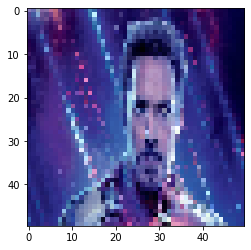

In [9]:
plt.imshow(arr)

In [10]:
twod = arr.mean(axis=2)

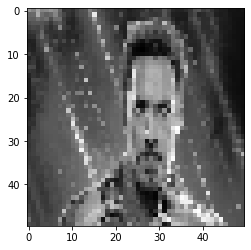

In [11]:
plt.imshow(twod,cmap="gray")

In [12]:
flat = twod.flatten()/255

In [13]:
flat.shape

(2500,)

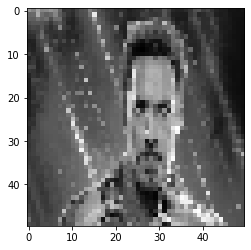

In [14]:
plt.imshow(flat.reshape(twod.shape),cmap='gray')

In [15]:
arr.shape

(50, 50, 3)

In [16]:
population =np.random.randn(1000,*flat.shape)

In [17]:
population.shape

(1000, 2500)

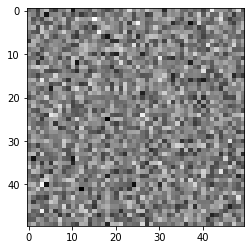

In [18]:
plt.imshow(population[100].reshape(twod.shape),cmap='gray')

In [19]:
flat.min(),flat.max()

(0.00784313725490196, 0.9869281045751633)

In [20]:
from tensorflow.keras.losses import MSE

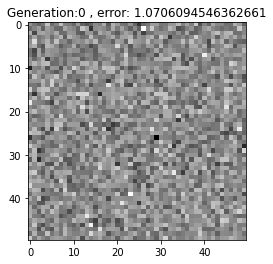

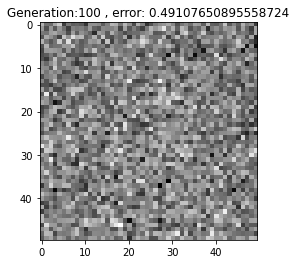

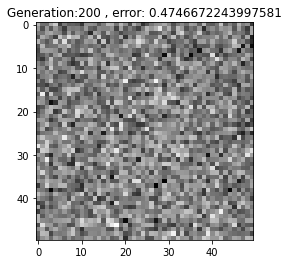

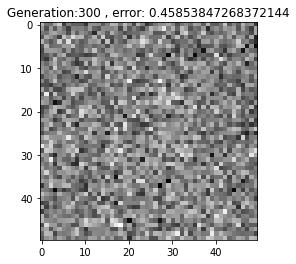

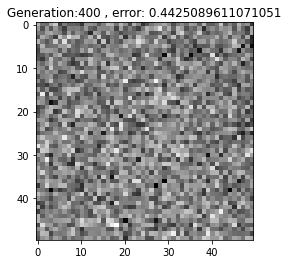

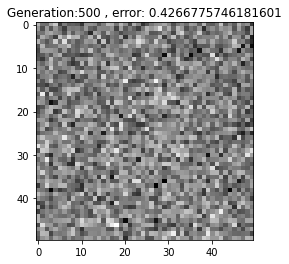

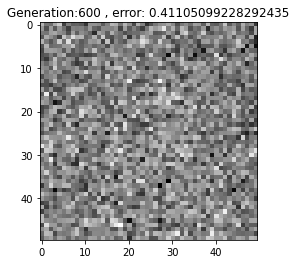

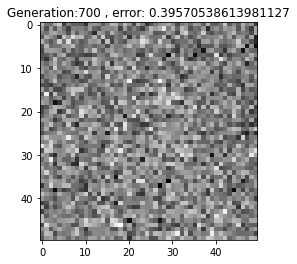

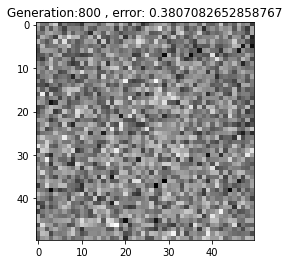

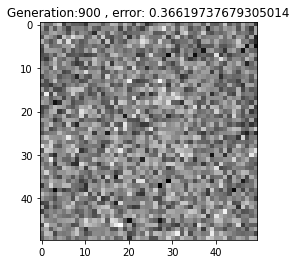

In [21]:
for generation in range(1000):    
    errors = MSE(flat,population)
    fit_idx = np.argsort(errors)[:10] # provides the value with the corrseponding index
    #fit_idx
    fit = population[fit_idx]
    #fit.shape
    first = fit[np.random.randint(0,10,1000)]
    second = fit[np.random.randint(0,10,1000)]
    #first.shape
    #second.shape
    first_sel = np.random.randint(0,2,first.shape)
    #second_sel = np.random.randint(0,2,second.shape)
    #first_sel
    # now we want that the first_sel and second_sel whihc are representing which featuures are comming from which selector, to be unique so that one featuure migght not come from both or may not be taken at all
    # to solve this, we have modified the way we take second
    second_sel = 1- first_sel
    population = first*first_sel + second*second_sel # generate algorithm without mutation(therfore practically the same dataset)
    # we genreate a mutation also
    population = population + np.random.randn(*population.shape) *.001
    
    if generation % 100==0: # after every 10 generaitions we need to show the best versiob of the picture which is available
        
        plt.figure()
        plt.title("Generation:{} , error: {}".format(generation,errors.numpy().min()))
        plt.imshow(fit[0].reshape(twod.shape),cmap="gray")
        plt.show()

In [22]:
# since having the mutation value to be low, the changes seen over the generations are poor, therfore we icrease the mutation value from 0.001 to 0.01